In [166]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [167]:
df = pd.read_csv("data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [168]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [169]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [170]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [171]:
def normalize(df):
    for col in df.columns:
        if (df[col].dtype=="int64" or df[col].dtype=="float64"):
            minval = df[col].min()
            maxval = df[col].max()
            df[col]= (df[col]-minval)/(maxval-minval)

normalize(df)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


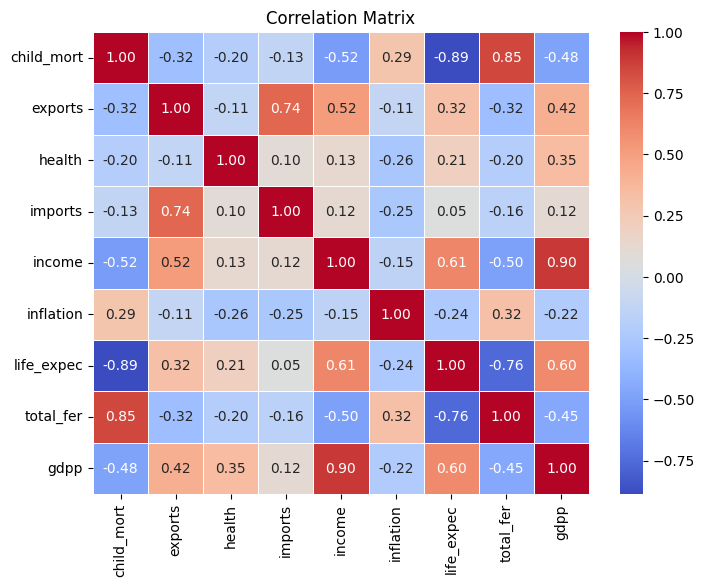

In [172]:
df_numerical = df.select_dtypes(include=[float, int])
corr_matrix = df_numerical.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title("Correlation Matrix")
plt.show()

In [173]:
df.drop('gdpp', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574


In [174]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]
    return centroids

def assign_clusters(X, centroids):
    clusters = []
    for i in range(X.shape[0]):
        distances = [euclidean_distance(X[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[clusters == i].mean(axis=0)
    return new_centroids

def kmeans(X, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    prev_centroids = np.zeros_like(centroids)
    clusters = np.zeros(X.shape[0])

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        centroids = update_centroids(X, clusters, k)

        if np.all(np.abs(centroids - prev_centroids) < tolerance):
            break
        prev_centroids = centroids.copy()
    
    return centroids, clusters


In [175]:
x = df_numerical.to_numpy()

centroids, clusters = kmeans(x,3)



In [176]:
clusters

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [177]:
centroids

array([[0.09683936, 0.20198974, 0.27547631, 0.27171294, 0.09675525,
        0.10913815, 0.79600535, 0.18385366, 0.06133856],
       [0.44855566, 0.14374556, 0.27839238, 0.24371101, 0.0236866 ,
        0.15178408, 0.53732194, 0.62446547, 0.01406841],
       [0.01118375, 0.29177116, 0.44172956, 0.29575955, 0.36332096,
        0.0623325 , 0.94961961, 0.0932402 , 0.40934   ]])

In [178]:
df['cluster'] = clusters

In [179]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0


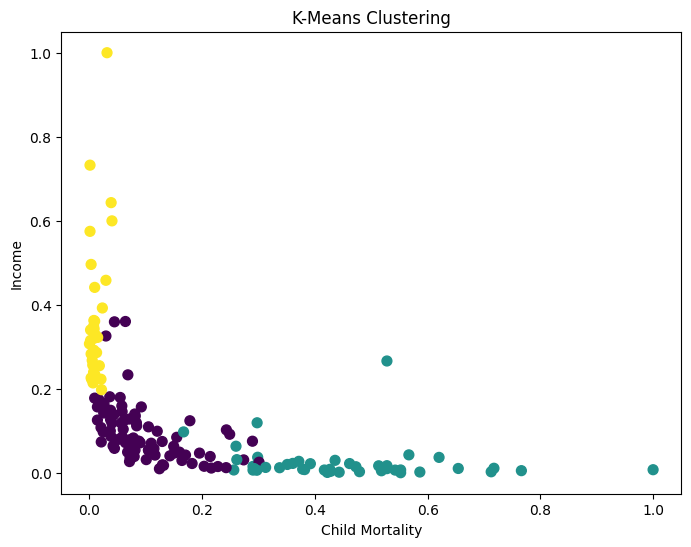

In [180]:
plt.figure(figsize=(8, 6))
plt.scatter(df['child_mort'], df['income'], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Child Mortality')
plt.ylabel('Income')
plt.show()

In [184]:
train = int(len(x) * 0.8)

shuffled_df = df.sample(frac=1).reset_index(drop=True)

x = shuffled_df.drop('cluster', axis=1, inplace=False)
y = shuffled_df['cluster']
x=x.to_numpy()
y=y.to_numpy()
x_train = x[:train]
x_test = x[train:]
y_train = y[:train]
y_test = y[train:]


In [182]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        distances = [euclidean_distance(x,x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        labels, counts = np.unique(k_nearest_labels, return_counts=True)
        return labels[np.argmax(counts)]

In [186]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [188]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    actual_positives = np.sum(y_true == 1)
    return true_positives / actual_positives if actual_positives > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0

In [189]:
print(accuracy(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9117647058823529
1.0
